# Tyler's Workspace

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# read in the data and change the 2nd column into datetime
housing_df = pd.read_csv('./data/kc_house_data.csv', parse_dates=[1])

In [15]:
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [16]:
# sqft_basement is currently an object type, we'll need to change it to numbers to use it
# Has zipcode as int64, we need to change it to a categorical variable to use it
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [17]:
# if we drop the 454 houses with no basement data, we would lose 2% of our data
housing_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
875.0         1
506.0         1
415.0         1
518.0         1
3500.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [20]:
import scipy.stats as stats

In [22]:
# I'm curious if there is a significant difference in price for those without basement data
na_basement = housing_df[housing_df['sqft_basement'] == '?']
stats.ttest_ind(na_basement['price'], housing_df['price'])

Ttest_indResult(statistic=-0.5735124870172023, pvalue=0.566303596077609)

In [23]:
# awesome, they're not significantly different from the population, let's drop them
housing_df = housing_df[housing_df['sqft_basement'] != '?']

In [30]:
housing_df['sqft_basement'] = housing_df['sqft_basement'].astype(float)

<ipython-input-30-dd799b41ef97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['sqft_basement'] = housing_df['sqft_basement'].astype(float)


In [44]:
np.cov(housing_df['price'], housing_df['sqft_living'])

array([[1.35479253e+11, 2.37453101e+08],
       [2.37453101e+08, 8.43729624e+05]])

In [53]:
no_price_df = housing_df.drop(['price'], axis=1)

In [47]:
housing_df.corr()['price'].sort_values()

zipcode         -0.053166
id              -0.015796
long             0.022101
yr_built         0.054459
sqft_lot15       0.083192
sqft_lot         0.087937
yr_renovated     0.128227
floors           0.256355
lat              0.306507
bedrooms         0.309204
sqft_basement    0.325008
bathrooms        0.525889
sqft_living15    0.586415
sqft_above       0.605143
sqft_living      0.702328
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

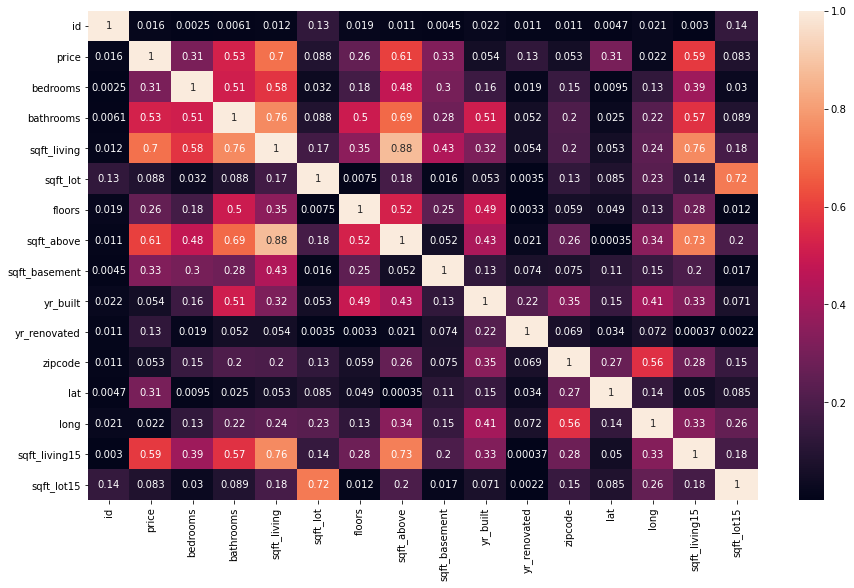

In [45]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(abs(housing_df.corr()), annot=True)


<AxesSubplot:>

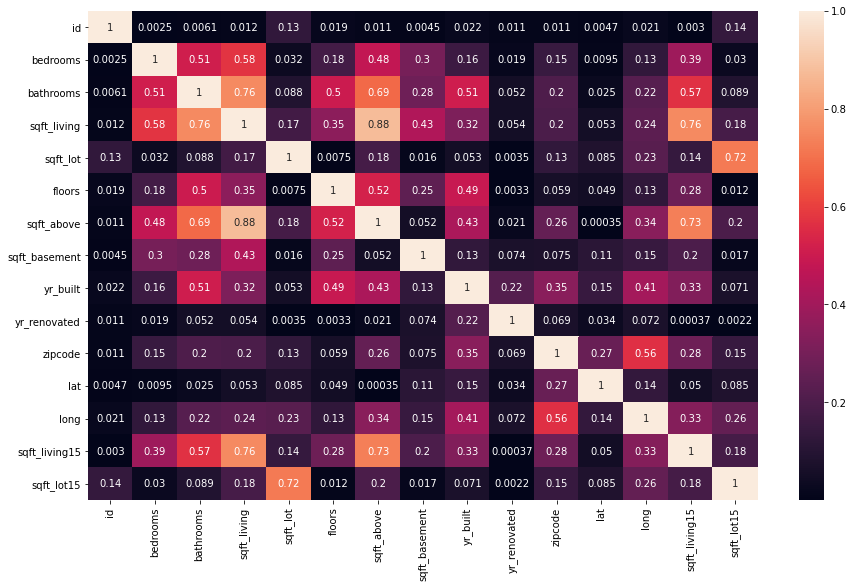

In [54]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(abs(no_price_df.corr()), annot=True)


In [31]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [11]:
housing_df.describe(include='object')

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


In [8]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [ ]:
X = housing_df[['']]